In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.pipeline import Pipeline



In [9]:
sns.set(style="whitegrid")

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [10]:
def evaluate_model(model, X_tr, X_te, y_tr, y_te, name):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, pos_label=1) 
    rec = recall_score(y_te, y_pred, pos_label=1)
    print(f"\n{name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    return acc, prec, rec

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results_svm = {}

for kern in kernels:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel=kern, C=1.0, random_state=42))
    ])
    acc, prec, rec = evaluate_model(pipe, X_train, X_test, y_train, y_test,
                                    f"SVM ({kern} kernel)")
    results_svm[kern] = (acc, prec, rec)


SVM (linear kernel)
Accuracy : 0.9860
Precision: 0.9889
Recall   : 0.9889

SVM (poly kernel)
Accuracy : 0.9021
Precision: 0.8654
Recall   : 1.0000

SVM (rbf kernel)
Accuracy : 0.9790
Precision: 0.9888
Recall   : 0.9778

SVM (sigmoid kernel)
Accuracy : 0.9510
Precision: 0.9560
Recall   : 0.9667


In [12]:
log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000))
])
acc_lr, prec_lr, rec_lr = evaluate_model(log_pipe, X_train, X_test, y_train, y_test,
                                         "Logistic Regression (L2)")



Logistic Regression (L2)
Accuracy : 0.9860
Precision: 0.9889
Recall   : 0.9889


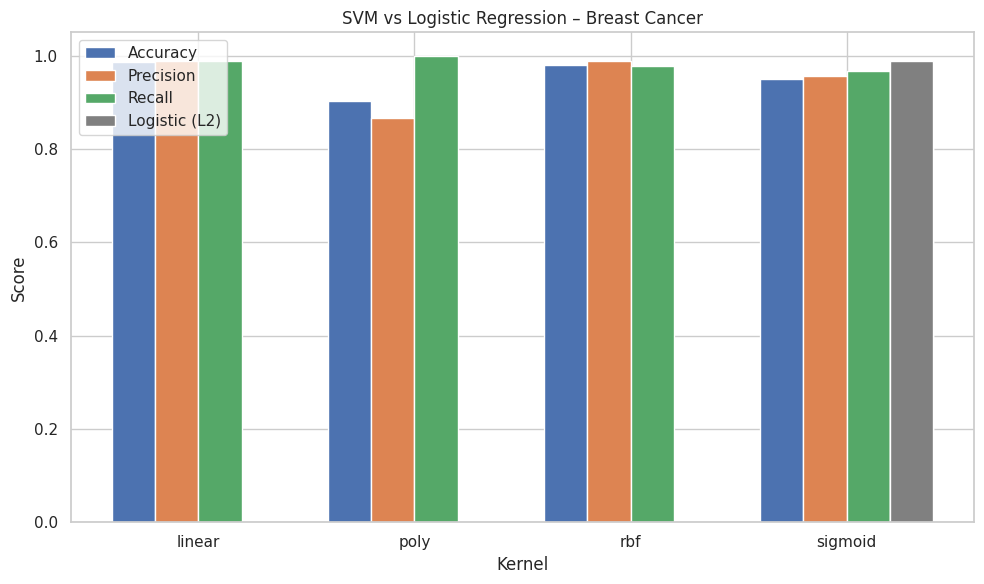

In [13]:
metrics = ['Accuracy', 'Precision', 'Recall']
svm_vals = {m: [] for m in metrics}
for kern in kernels:
    a, p, r = results_svm[kern]
    svm_vals['Accuracy'].append(a)
    svm_vals['Precision'].append(p)
    svm_vals['Recall'].append(r)

lr_vals = [acc_lr, prec_lr, rec_lr]

x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, svm_vals[metric], width, label=metric)

ax.bar(x[-1] + 3*width, lr_vals, width, color='gray', label='Logistic (L2)')

ax.set_xlabel('Kernel')
ax.set_ylabel('Score')
ax.set_title('SVM vs Logistic Regression – Breast Cancer')
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels(kernels)
ax.legend()
plt.tight_layout()
plt.show()